This notebook generates figures illustrating the multi-step prediction accuracy of the heat equation with Neumann boundary conditions (with a=-0.5, b=0.5), as described in Supplementary Material Section 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Llama-3.1-8B model data
with np.load("8B_10_step.npz", allow_pickle=True) as data_8b:
    # LLM metrics
    llm_max_diffs = data_8b["llm_max_diffs_8B"]
    llm_rmses = data_8b["llm_rmses_8B"]
    std_max_diffs = data_8b["std_max_diffs_8B"]
    std_rmses = data_8b["std_rmses_8B"]
    # Pre-computed confidence intervals
    ci_lower_max_diffs = data_8b["ci_lower_max_diffs_8B"]
    ci_upper_max_diffs = data_8b["ci_upper_max_diffs_8B"]
    ci_lower_rmses = data_8b["ci_lower_rmses_8B"]
    ci_upper_rmses = data_8b["ci_upper_rmses_8B"]
    # Finite-difference metrics
    ftcs_max_diff = data_8b["ftcs_max_diffs"]
    ftcs_rmse = data_8b["ftcs_rmses"]
    btcs_max_diff = data_8b["btcs_max_diffs"]
    btcs_rmse = data_8b["btcs_rmses"]
    # Baseline metrics
    baseline_max_errors_prediction = data_8b["avg_baseline_max_errors_prediction"]
    baseline_rmse_errors_prediction = data_8b["avg_baseline_rmse_errors_prediction"]

# Load Llama-3.2-3B model data
with np.load("3B_10_step.npz", allow_pickle=True) as data_3b:
    # LLM metrics
    llm_max_diffs_3B = np.array(data_3b["llm_max_diffs_3B"])
    llm_rmses_3B = np.array(data_3b["llm_rmses_3B"])
    std_max_diffs_3B = np.array(data_3b["std_max_diffs_3B"])
    std_rmses_3B = np.array(data_3b["std_rmses_3B"])
    # Pre-computed confidence intervals
    ci_lower_max_diffs_3B = data_3b["ci_lower_max_diffs_3B"]
    ci_upper_max_diffs_3B = data_3b["ci_upper_max_diffs_3B"]
    ci_lower_rmses_3B = data_3b["ci_lower_rmses_3B"]
    ci_upper_rmses_3B = data_3b["ci_upper_rmses_3B"]

# Load Llama-3.2-1B model data
with np.load("1B_10_step.npz", allow_pickle=True) as data_1b:
    # LLM metrics
    llm_max_diffs_1B = np.array(data_1b["llm_max_diffs_1B"])
    llm_rmses_1B = np.array(data_1b["llm_rmses_1B"])
    std_max_diffs_1B = np.array(data_1b["std_max_diffs_1B"])
    std_rmses_1B = np.array(data_1b["std_rmses_1B"])
    # Pre-computed confidence intervals
    ci_lower_max_diffs_1B = data_1b["ci_lower_max_diffs_1B"]
    ci_upper_max_diffs_1B = data_1b["ci_upper_max_diffs_1B"]
    ci_lower_rmses_1B = data_1b["ci_lower_rmses_1B"]
    ci_upper_rmses_1B = data_1b["ci_upper_rmses_1B"]

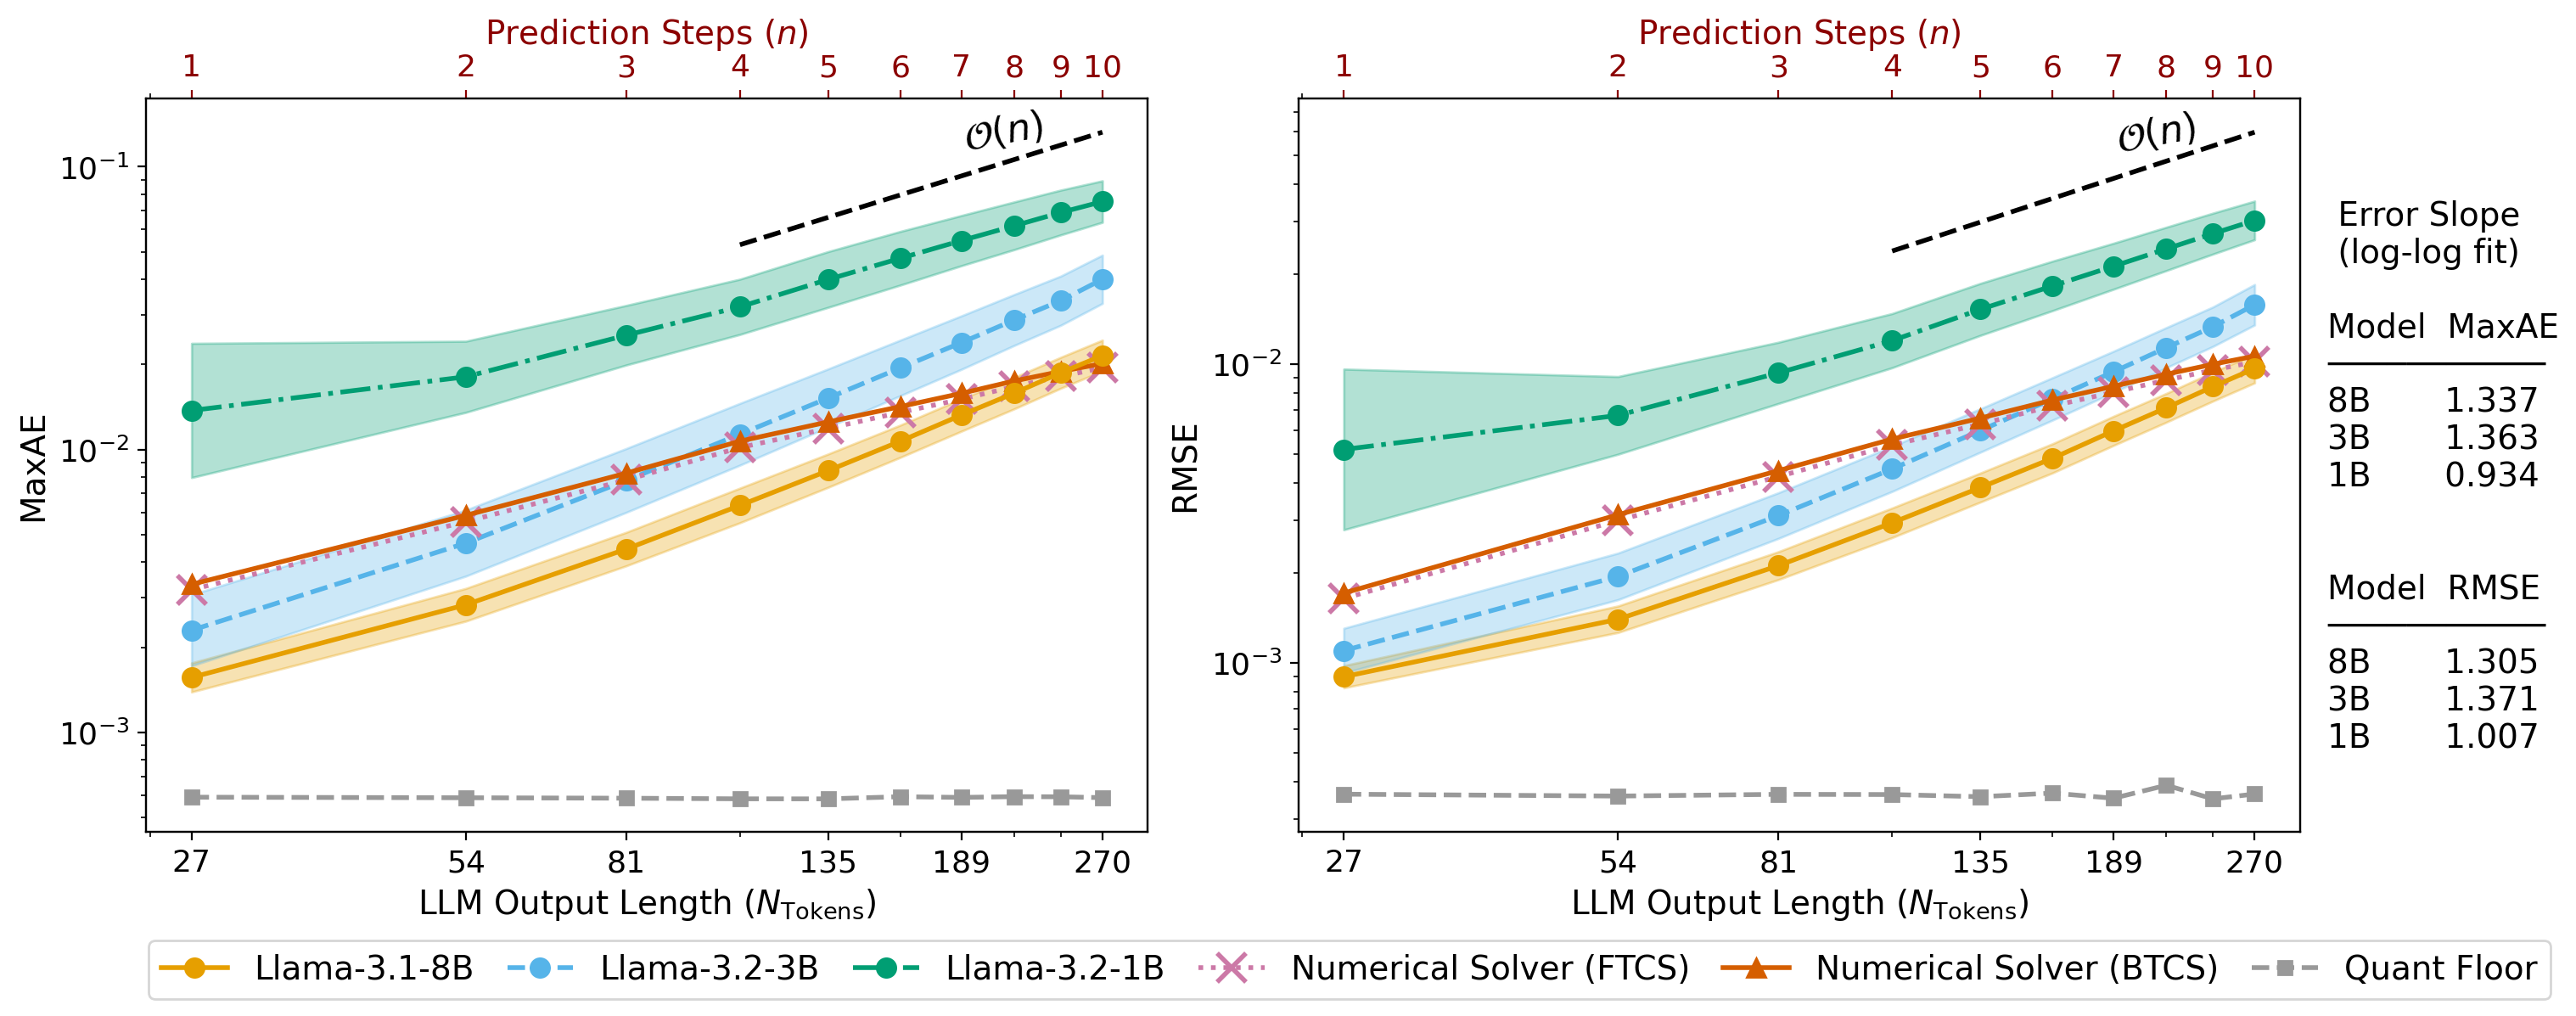

In [3]:
reference_index=6
names = ['Llama-3.1-8B', 'Llama-3.2-3B', 'Llama-3.2-1B']
short_names = ['8B', '3B', '1B']
max_diffs_list = [llm_max_diffs, llm_max_diffs_3B, llm_max_diffs_1B]
rmses_list = [llm_rmses, llm_rmses_3B, llm_rmses_1B]
n_min, n_max = 4, 10
n_vals = np.arange(n_min, n_max + 1)
idx = n_vals - 1
# Calculate slopes for LLMs
max_diff_slopes = []
rmse_slopes = []
for name, max_errs, rmse_errs in zip(names, max_diffs_list, rmses_list):
    log_n = np.log(n_vals)
    log_max_err = np.log(max_errs[idx])
    log_rmse_err = np.log(rmse_errs[idx])
    max_slope, _ = np.polyfit(log_n, log_max_err, 1)
    rmse_slope, _ = np.polyfit(log_n, log_rmse_err, 1)
    max_diff_slopes.append(max_slope)
    rmse_slopes.append(rmse_slope)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=200)
steps_array = np.arange(1, len(llm_max_diffs) + 1)
colors = [
    "#E69F00",  # Llama-3.1-8B
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # FTCS
    "#D55E00",  # BTCS
    "#999999",  # Quant Floor
]

power_law_color = "black"
linewidth = 2
# Compute power law reference lines O(n)
max_diff_reference = llm_max_diffs[reference_index]
rmse_reference = llm_rmses[reference_index]
power_law_max_diff = [max_diff_reference * n for n in steps_array]
power_law_rmse = [rmse_reference * n for n in steps_array]
# Plot Maximum Difference (left subplot)
ax1.loglog(steps_array, llm_max_diffs, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax1.fill_between(steps_array, ci_lower_max_diffs, ci_upper_max_diffs,
                 alpha=0.3, color=colors[0])
ax1.loglog(steps_array, llm_max_diffs_3B, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_max_diffs_3B, ci_upper_max_diffs_3B,
                 alpha=0.3, color=colors[1])
ax1.loglog(steps_array, llm_max_diffs_1B, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax1.fill_between(steps_array, ci_lower_max_diffs_1B, ci_upper_max_diffs_1B,
                 alpha=0.3, color=colors[2])
ax1.loglog(steps_array[:len(ftcs_max_diff)], ftcs_max_diff, 'x:', markeredgewidth=2,
           label='Numerical Solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax1.loglog(steps_array[:len(btcs_max_diff)], btcs_max_diff, '^-',
           label='Numerical Solver (BTCS)', color=colors[4], markersize=8, linewidth=linewidth)
# Add O(n) reference line and annotation
ax1.loglog(steps_array[3:11], power_law_max_diff[3:11], '--',
           linewidth=linewidth, color=power_law_color)
ax1.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_max_diff[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)
ax1.loglog(steps_array, baseline_max_errors_prediction, 's--', color=colors[5],
            label='Quant Floor', markersize=6, linewidth=linewidth)
ax1.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax1.set_ylabel("MaxAE", fontsize=14)

# Plot RMSE (right subplot)
ax2.loglog(steps_array, llm_rmses, 'o-', label='Llama-3.1-8B',
           color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax2.fill_between(steps_array, ci_lower_rmses, ci_upper_rmses,
                 alpha=0.3, color=colors[0])
ax2.loglog(steps_array, llm_rmses_3B, 'o--', label='Llama-3.2-3B',
           color=colors[1], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_rmses_3B, ci_upper_rmses_3B,
                 alpha=0.3, color=colors[1])
ax2.loglog(steps_array, llm_rmses_1B, 'o-.', label='Llama-3.2-1B',
           color=colors[2], markersize=8, linewidth=linewidth)
ax2.fill_between(steps_array, ci_lower_rmses_1B, ci_upper_rmses_1B,
                 alpha=0.3, color=colors[2])
ax2.loglog(steps_array[:len(ftcs_rmse)], ftcs_rmse, 'x:', markeredgewidth=2,
           label='Numerical Solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)
ax2.loglog(steps_array[:len(btcs_rmse)], btcs_rmse, '^-',
           label='Numerical Solver (BTCS)', color=colors[4], markersize=8, linewidth=linewidth)

# Add O(n) reference line and annotation
ax2.loglog(steps_array[3:11], power_law_rmse[3:11], '--',
           color=power_law_color, linewidth=linewidth)
ax2.annotate(r'$\mathcal{O}(n)$',
             xy=(steps_array[reference_index], power_law_rmse[reference_index + 1]),
             xytext=(0, 4), textcoords='offset points',
             color=power_law_color, fontsize=16, rotation=10)
ax2.loglog(steps_array, baseline_rmse_errors_prediction, 's--', color=colors[5],
            label='Quant Floor', markersize=6, linewidth=linewidth)
ax2.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=14)
ax2.set_ylabel("RMSE", fontsize=14)

# Set tick positions and labels
selected_positions = [1, 2, 3, 5, 7, 10] 
selected_tick_positions = [pos for pos in steps_array if pos in selected_positions]
token_tick_labels = [str(int(pos * 27)) for pos in selected_tick_positions]
ax1.set_xticks(selected_tick_positions)
ax1.set_xticklabels(token_tick_labels)
ax2.set_xticks(selected_tick_positions)
ax2.set_xticklabels(token_tick_labels)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

# Add top x-axis
ax1_top = ax1.twiny()
ax2_top = ax2.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax2_top.set_xlim(ax2.get_xlim())
ax1_top.set_xscale('log')
ax2_top.set_xscale('log')
ax1_top.set_xticks(list(steps_array))
ax1_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax2_top.set_xticks(list(steps_array))
ax2_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax1_top.set_xlabel("Prediction Steps ($n$)", fontsize=14, color='darkred')
ax2_top.set_xlabel("Prediction Steps ($n$)", fontsize=14, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2,
           bbox_to_anchor=(0.5, 0.0), columnspacing=1)
slope_text = " Error Slope\n (log-log fit)\n\n"
slope_text += "Model  MaxAE\n"
slope_text += "───────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7}  {max_diff_slopes[i]:>5.3f}\n"
slope_text += "\n\n"
slope_text += "Model  RMSE\n"
slope_text += "───────────\n"
for i, short_name in enumerate(short_names):
    slope_text += f"{short_name:<7}  {rmse_slopes[i]:>5.3f}\n"
fig.text(0.86, 0.51, slope_text, transform=fig.transFigure, 
         fontsize=14,
         verticalalignment='center')

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, bottom=0.18, top=0.9, right=0.85) 
plt.show()